In [ ]:
from google.colab import files
files.upload()

Saving data1.xlsx to data1.xlsx


{'data1.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\xdd+\x8bXl\x01\x00\x00\x10\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

## Data Understanding

In [ ]:
df = pd.read_excel("data1.xlsx")
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,produk,tgl_waktu
0,1,Gula Pasir 250gr,2023-06-01 09:11:00
1,1,Gula Pasir 250gr,2023-06-01 09:11:00
2,2,Wincheez,2023-06-01 09:33:00
3,2,Selai Coklat Biasa 250gr,2023-06-01 09:33:00
4,2,Diamond Coklat Blok,2023-06-01 09:33:00
...,...,...,...
1218,502,Claris Merah,2023-07-31 14:02:00
1219,502,Dancow Sachet,2023-07-31 14:02:00
1220,502,Dancow Sachet,2023-07-31 14:02:00
1221,503,Sun Kara,2023-07-31 15:03:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         1223 non-null   int64         
 1   produk     1223 non-null   object        
 2   tgl_waktu  1223 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 28.8+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,produk,tgl_waktu
0,1,Gula Pasir 250gr,2023-06-01 09:11:00
1,1,Gula Pasir 250gr,2023-06-01 09:11:00
2,2,Wincheez,2023-06-01 09:33:00
3,2,Selai Coklat Biasa 250gr,2023-06-01 09:33:00
4,2,Diamond Coklat Blok,2023-06-01 09:33:00
5,3,Sterofoam Bubur,2023-06-01 12:03:00
6,3,Kresek Tomat 24,2023-06-01 12:03:00
7,3,Forvita 500gr,2023-06-01 12:03:00
8,4,Wayang 10x15x05,2023-06-01 14:14:00
9,5,Sedotan Pop Ice,2023-06-01 19:14:00


In [ ]:
# Cek missing value dan zeros
print(df.isnull().sum().sort_values(ascending=False))

id           0
produk       0
tgl_waktu    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Data Preparation

In [ ]:
# merubah format waktu menjadi bulan, hari, jam
df['tgl_waktu'] = pd.to_datetime(df['tgl_waktu'], format="%d-%m-%Y %H:%M")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df["bulan"] = df['tgl_waktu'].dt.month
df["hari"] = df['tgl_waktu'].dt.weekday
df["jam"] = df['tgl_waktu'].dt.hour

df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,produk,tgl_waktu,bulan,hari,jam
0,1,Gula Pasir 250gr,2023-06-01 09:11:00,6,3,9
1,1,Gula Pasir 250gr,2023-06-01 09:11:00,6,3,9
2,2,Wincheez,2023-06-01 09:33:00,6,3,9
3,2,Selai Coklat Biasa 250gr,2023-06-01 09:33:00,6,3,9
4,2,Diamond Coklat Blok,2023-06-01 09:33:00,6,3,9
...,...,...,...,...,...,...
1218,502,Claris Merah,2023-07-31 14:02:00,7,0,14
1219,502,Dancow Sachet,2023-07-31 14:02:00,7,0,14
1220,502,Dancow Sachet,2023-07-31 14:02:00,7,0,14
1221,503,Sun Kara,2023-07-31 15:03:00,7,0,15


In [ ]:
# Mencetak 20 data penjualan item terbanyak
most_sold = df['produk'].value_counts().head(10)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

produk
Evaporasi F&N               41
Tepung Roti 250gr           40
Sterofoam Seblak            36
Bader 10x20                 34
Bader 12x25                 30
Wincheez                    29
Selai Coklat Biasa 250gr    28
Bader 15x30                 24
Wayang 14x25x05             24
Sterofoam Mangkok Besar     21
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Jumlah Produk Yg Terjual')

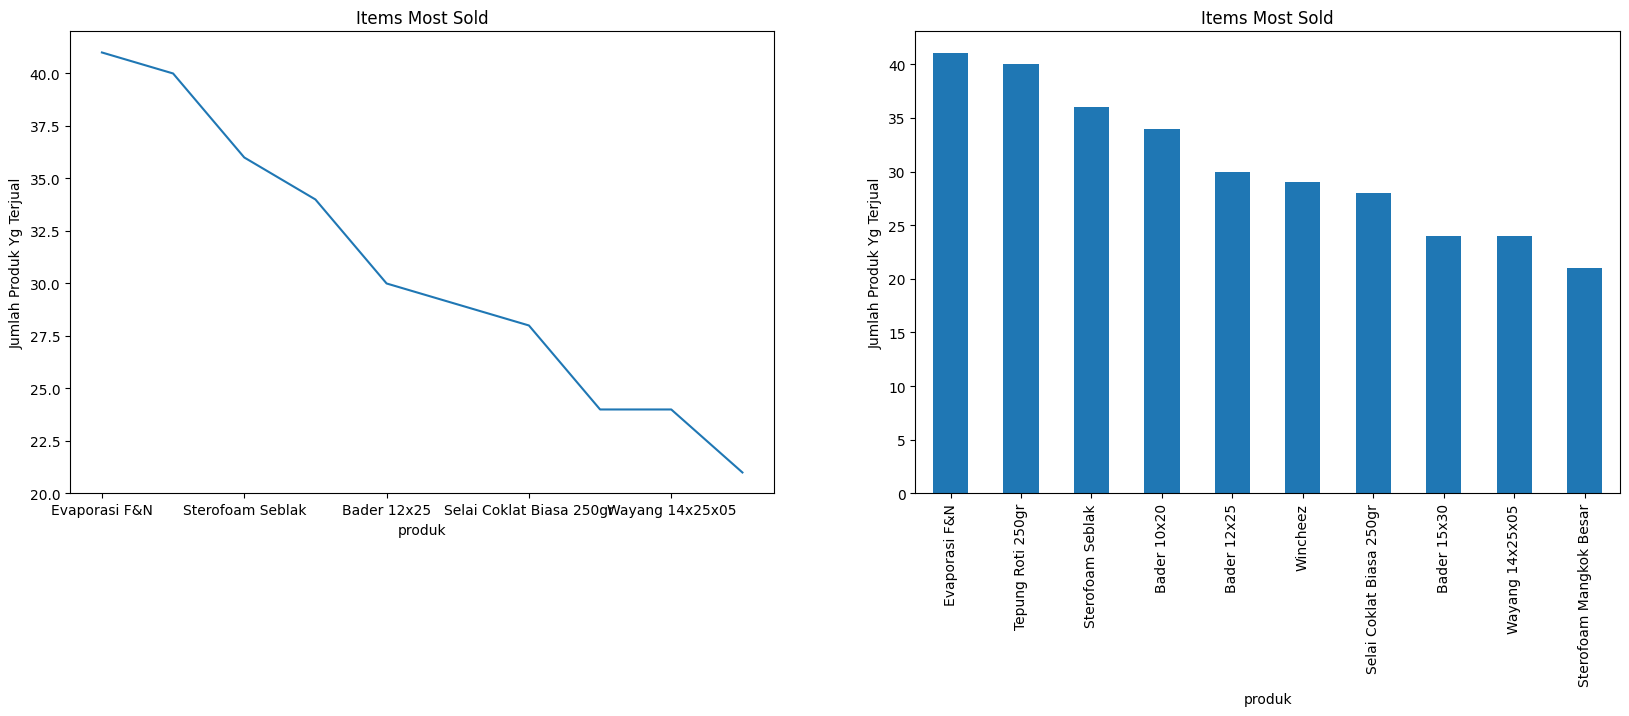

In [ ]:
# visualisasikan data penjualan item terbanyak ke line chart dan bar chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
most_sold.plot(kind='line')
plt.title('Items Most Sold')
plt.ylabel("Jumlah Produk Yg Terjual")


plt.subplot(1,2,2)
most_sold.plot(kind='bar')
plt.title('Items Most Sold')
plt.ylabel("Jumlah Produk Yg Terjual")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


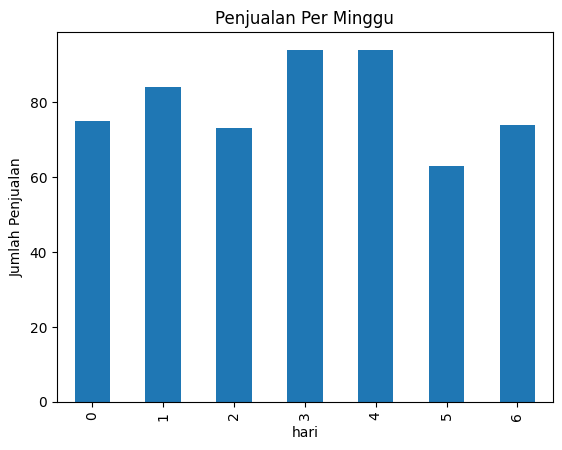

In [ ]:
df.groupby('hari')['produk'].nunique().plot(kind='bar', title='Penjualan Per Minggu')
plt.ylabel("Jumlah Penjualan")
plt.show()

In [ ]:
print(df.groupby('bulan')['hari'].nunique())

bulan
6    7
7    7
Name: hari, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['id'].unique():
    tlist = list(set(df[df['id']==i]['produk']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


503


In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df2.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Alumunium Foil,Bader 10x20,Bader 12x25,Bader 15x30,Baking Powder,Blueband Master 250gr,Buldozer 15 Hitam,Buldozer 15 Putih,Buldozer 24 Putih,Cakra Kembar,...,Wayang 14x25x05,Wayang 17x30x05,Wayang 20x35x05,Wayang 7x15x05,Wayang 8x15x05,Whippy Haan,Wijen 250gr,Wincheez,Wrap Cling 30cm,fermipan 50gr
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequent_itemsets = fpgrowth(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('confidence', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
42,"(Bader 10x20, Sterofoam Seblak)",(Bader 12x25),0.011928,1.000000,20.958333
18,"(Sterofoam Mangkok Besar, Sendok Bebek)",(Sterofoam Seblak),0.011928,1.000000,13.972222
59,"(Sterofoam Mangkok Besar, Bader 10x20)","(Bader 12x25, Sterofoam Seblak)",0.011928,1.000000,71.857143
55,"(Sterofoam Mangkok Besar, Bader 10x20, Sterofo...",(Bader 12x25),0.011928,1.000000,20.958333
54,"(Bader 12x25, Bader 10x20, Sterofoam Seblak)",(Sterofoam Mangkok Besar),0.011928,1.000000,23.952381
...,...,...,...,...,...
45,(Sterofoam Seblak),"(Bader 12x25, Bader 10x20)",0.011928,0.166667,8.383333
51,(Sterofoam Seblak),"(Sterofoam Mangkok Besar, Bader 10x20)",0.011928,0.166667,13.972222
65,(Sterofoam Seblak),"(Bader 12x25, Sterofoam Mangkok Besar, Bader 1...",0.011928,0.166667,13.972222
33,(Sterofoam Seblak),(Bader 10x20),0.011928,0.166667,4.657407


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.019881,(Gula Pasir 250gr)
1,0.055666,(Selai Coklat Biasa 250gr)
2,0.053678,(Wincheez)
3,0.033797,(Diamond Coklat Blok)
4,0.033797,(Sterofoam Bubur)
...,...,...
65,0.011928,"(Bader 10x20, Sterofoam Mangkok Besar, Bader 1..."
66,0.011928,"(Bader 10x20, Sterofoam Seblak, Bader 12x25)"
67,0.011928,"(Bader 10x20, Sterofoam Mangkok Besar, Sterofo..."
68,0.011928,"(Bader 10x20, Sterofoam Mangkok Besar, Sterofo..."


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
